In [1]:
import os
import os.path as osp

import numpy as np
import random

from bisect import bisect

import matplotlib.pyplot as plt


# set random seed for reproducibility
manual_seed = 42
random.seed(manual_seed)

In [2]:
# Load Data
data_folder = "./Data"
spectra_complete_raw = np.load(osp.join(data_folder, "spectra_complete.npy")).astype(np.float32) 
#known issue: measurements are listed in descending order of wavelengths for some reason... 
spectra = np.flip(spectra_complete_raw, axis=1)
spectra_reduced = np.load(osp.join(data_folder, "spectra_reduced.npy")).astype(np.float32)

# Partition into training and test sets
TRAINING_DATA = int(spectra.shape[0] * 0.9)
TEST_DATA = int(spectra.shape[0] * 0.1)
training_ids = sorted(random.sample(range(spectra.shape[0]), TRAINING_DATA))
test_ids = [item for item in range(0,spectra.shape[0]) if item not in training_ids]

# Cure data into the 5-35 spectrum range

#load the sampled wavelenths
NLA = 223
NLA_reduced = 20
wavelength_values = np.loadtxt(osp.join(data_folder, 'wavelengths_complete_reduced_serial.txt')) 
wavelength_values_reduced = sorted(wavelength_values[:NLA_reduced]) # ascending order
wavelength_values_complete = sorted(wavelength_values[NLA_reduced:])# ascending order

#restrict complete data into the 5-35 range
low_wv = 5
high_wv = 35
idx_low = bisect(wavelength_values_complete, low_wv)
idx_high = bisect(wavelength_values_complete, high_wv)
print("Low End of the spectrum: " + str(wavelength_values_complete[idx_low]))
print("High End of the spectrum: " + str(wavelength_values_complete[idx_high]))
spectra_complete = spectra[:, idx_low:(idx_high+1)]
wavelenths_complete = wavelength_values_complete[idx_low:(idx_high+1)]


# Save Data
dataset_dir = osp.join(data_folder, "Dataset_5_35")
if not osp.exists(dataset_dir):
    os.mkdir(dataset_dir)
    
# save the complete spectra in the 5-35 range
np.save(osp.join(dataset_dir,"spectra_complete_training_5_35.npy"), spectra_complete[training_ids])
np.save(osp.join(dataset_dir,"spectra_complete_testing_5_35.npy"), spectra_complete[test_ids])
# save the reduced spectra
np.save(osp.join(dataset_dir,"spectra_reduced_training.npy"), spectra_reduced[training_ids])
np.save(osp.join(dataset_dir,"spectra_reduced_testing.npy"), spectra_reduced[test_ids])
# save the complete spectra in the full range
np.save(osp.join(dataset_dir,"spectra_complete_training.npy"), spectra[training_ids])
np.save(osp.join(dataset_dir,"spectra_complete_testing.npy"), spectra[test_ids])

# save the ids
np.save(osp.join(dataset_dir,"training_ids.npy"), training_ids)
np.save(osp.join(dataset_dir,"test_ids.npy"), test_ids)

# save the wavelengths
np.save(osp.join(dataset_dir,"wavelenths_complete_5_35.npy"), wavelenths_complete)
np.save(osp.join(dataset_dir,"wavelenths_complete.npy"), wavelength_values_complete)
np.save(osp.join(dataset_dir,"wavelenths_reduced.npy"), wavelength_values_reduced)

Low End of the spectrum: 5.1
High End of the spectrum: 35.2


In [3]:
# Checks

dataset_dir = "./Data/Dataset_5_35"

training_5_35 = np.load(osp.join(dataset_dir,"spectra_complete_training_5_35.npy"))
test_5_35 = np.load(osp.join(dataset_dir,"spectra_complete_testing_5_35.npy"))

training = np.load(osp.join(dataset_dir,"spectra_complete_training.npy"))
test = np.load(osp.join(dataset_dir,"spectra_complete_testing.npy"))

training_reduced = np.load(osp.join(dataset_dir,"spectra_reduced_training.npy"))
test_reduced = np.load(osp.join(dataset_dir,"spectra_reduced_testing.npy"))


wavelengths_complete_5_35 = np.load(osp.join(dataset_dir,"wavelenths_complete_5_35.npy"))
wavelengths_complete = np.load(osp.join(dataset_dir,"wavelenths_complete.npy"))
wavelengths_reduced = np.load(osp.join(dataset_dir,"wavelenths_reduced.npy"))

training_ids = np.load(osp.join(dataset_dir,"training_ids.npy"))
test_ids = np.load(osp.join(dataset_dir,"test_ids.npy"))


print(wavelengths_complete)
print(wavelengths_reduced)

print(test_ids)

[3.0300e-02 3.3300e-02 3.6700e-02 4.0300e-02 4.4400e-02 4.8800e-02
 5.3699e-02 5.9100e-02 6.4999e-02 7.1501e-02 7.8600e-02 8.6501e-02
 9.1199e-02 9.5100e-02 1.0500e-01 1.1500e-01 1.2700e-01 1.3900e-01
 1.5300e-01 1.6900e-01 1.8500e-01 2.0400e-01 2.1750e-01 2.2400e-01
 2.4700e-01 2.7100e-01 2.9900e-01 3.2800e-01 3.6500e-01 3.9700e-01
 4.4000e-01 4.8101e-01 5.2901e-01 5.5000e-01 5.8200e-01 6.4000e-01
 7.0000e-01 7.7400e-01 8.5200e-01 8.9999e-01 9.3700e-01 1.0310e+00
 1.1340e+00 1.2500e+00 1.3720e+00 1.5090e+00 1.6500e+00 1.8260e+00
 2.0090e+00 2.2000e+00 2.4300e+00 2.6000e+00 2.9000e+00 3.1000e+00
 3.2000e+00 3.2500e+00 3.3000e+00 3.3500e+00 3.4000e+00 3.4500e+00
 3.5500e+00 3.7000e+00 4.1000e+00 4.5000e+00 4.8000e+00 4.9501e+00
 5.1000e+00 5.2000e+00 5.3001e+00 5.5000e+00 5.6999e+00 5.9000e+00
 6.1000e+00 6.2000e+00 6.3000e+00 6.4000e+00 6.5999e+00 6.8000e+00
 6.9000e+00 7.0000e+00 7.1000e+00 7.2000e+00 7.3000e+00 7.5000e+00
 7.5999e+00 7.7000e+00 7.7999e+00 7.9001e+00 8.1999e+00 8.4000

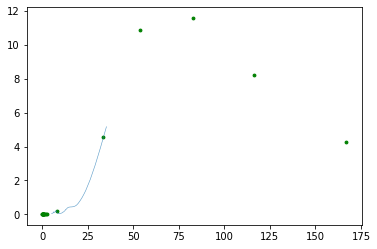

In [4]:
i = 10


fig, ax = plt.subplots()
ax.plot(wavelengths_complete_5_35, test_5_35[i], alpha=0.7, linewidth=0.6)
ax.scatter(wavelengths_reduced, test_reduced[i], s=8, color="green")


In [2]:
# save log dataset

dataset_dir = "./Data/Dataset_5_35"

training = np.load(osp.join(dataset_dir,"spectra_complete_training.npy"))
test = np.load(osp.join(dataset_dir,"spectra_complete_testing.npy"))

log_training = np.log10(training)
log_test = np.log10(test)

# save the log_data
np.save(osp.join(dataset_dir,"log_training.npy"), log_training)
np.save(osp.join(dataset_dir,"log_test.npy"), log_test)